# Spaceship Titanic Solution Walkthrough 

The purpose of the notebook is to practice Exploratory Data Analysis, Visualization, and Machine Learning as well as show you how I have applied a systematic Data Science workflow as I navigate through this project.


## Data Science Workflow
> The foundation of this workflow was based on the author's citations in this [notebook](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook). I figured there was still room for more C's so I bothered making a more sophisticated and obssessive-compulsive framework.
- **Comprehend.** *Exploratory Data Analysis.* Understand the nature and relationships among each features in the datasets through data analyses and visualization.
- **Correlate.** *Feature Selection* Validate the strength of association across features with the appopriate statistical tools and metrics, and to select the features that are significantly relevant with the solution goal.
- **Clean.** *Data Cleaning.* Identify and remedy missing/null values by imputing them with reasonable inputs.  
- **Create.** *Feature Engineering.* Create new features out of the existing ones which can make better predictions while also reducing noise in the number of features.
- **Convert.** *Data Preprocessing.* Perform the necessary adjustments (one-hot encoding) and data transformations (i.e. sqrt, log trasformations) to make the data fit for modelling.
- **Complete.** *Training Model.* Completion of a working and cleaned dataset in preparation for training the model and predicting solutions out of it. 
- **Configure.** *Hyperparameter Tuning.* Further optimize our learning algorithms by determining and running the optimal parameters. 
- **Combine.** *Ensemble Learning.* Combine multiple algorithms into one that can leverage the strengths and compensates the weaknesses of the tested models.

## Background of the Problem
The complete overview and description of the Kaggle competition be found [here](https://www.kaggle.com/competitions/spaceship-titanic/overview). Here are some of information we were provided with the link.
- The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.
- While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

Credits to the creator who made this awesome Python package *mplcyberpunk*, which is suppported by matplotlib that allows us to create very aesthetically breathtaking visualizations surrounding the 'cyberpunk' theme and style. You can check more about this work [HERE](https://github.com/dhaitz/mplcyberpunk/blob/master/README.md).

In [1]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Breathtaking visuals
import mplcyberpunk

In [3]:
plt.style.use("cyberpunk")

In [4]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [5]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
def missing_values(df):
    # Calculate missing value and their percentage for each feature
    missing_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_percent = pd.DataFrame(missing_percent).round(2)
    df_missing_percent = df_missing_percent.reset_index().rename(
                    columns={
                            'index':'Feature',
                            0:'Missing Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Feature',
                            0:'Missing Values'
                    }
                )

    Final = df_missing_value.merge(df_missing_percent, how = 'inner', left_on = 'Feature', right_on = 'Feature')
    Final = Final.sort_values(by = 'Missing Percentage (%)',ascending = False)
    return Final

missing_values(train_df)

,Feature,Missing Values,Missing Percentage (%)
2,CryoSleep,217,2.50
9,ShoppingMall,208,2.39
6,VIP,203,2.34
1,HomePlanet,201,2.31
12,Name,200,2.30
3,Cabin,199,2.29
11,VRDeck,188,2.16
8,FoodCourt,183,2.11
10,Spa,183,2.11
4,Destination,182,2.09


In [11]:
missing_values(test_df)

,Feature,Missing Values,Missing Percentage (%)
8,FoodCourt,106,2.48
10,Spa,101,2.36
3,Cabin,100,2.34
9,ShoppingMall,98,2.29
12,Name,94,2.20
2,CryoSleep,93,2.17
6,VIP,93,2.17
4,Destination,92,2.15
5,Age,91,2.13
1,HomePlanet,87,2.03


**Missing Values**
- The proportion of missing values to the total entries in each feature are relatively small, ranging from 0% to 2.5%.

**Data Types**
- Numerical. *Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*
- Categorical. *HomePlanet, CryoSleep, Destination, VIP*
- Mixed/Alphanumeric. *Cabin, Name*
- Target Categorical. *Transported*

### Interesting Questions and Hypotheses
- **Cabin vs Cryosleep.** Does a cryosleep facility have its designated cabin area?
- **PassengerId group** (gggg=group, pp=number) **vs HomePlanet and Destination.** Did passengers within their groups travel together, which means coming from the same HomePlanet and debarking to the same Destination.
- **CryoSleep vs Services.** Did passengers who elected to cryosleep have lower expenditures?
- **CryoSleep vs PassengerId group.** Were those who traveled alone in the group likely to undergo CryoSleep?
- **VIP vs Services.** How the services and expenditures from VIP members differ from non-VIPs?

In [12]:
df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
df_cat = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']]

# Numerical Variables

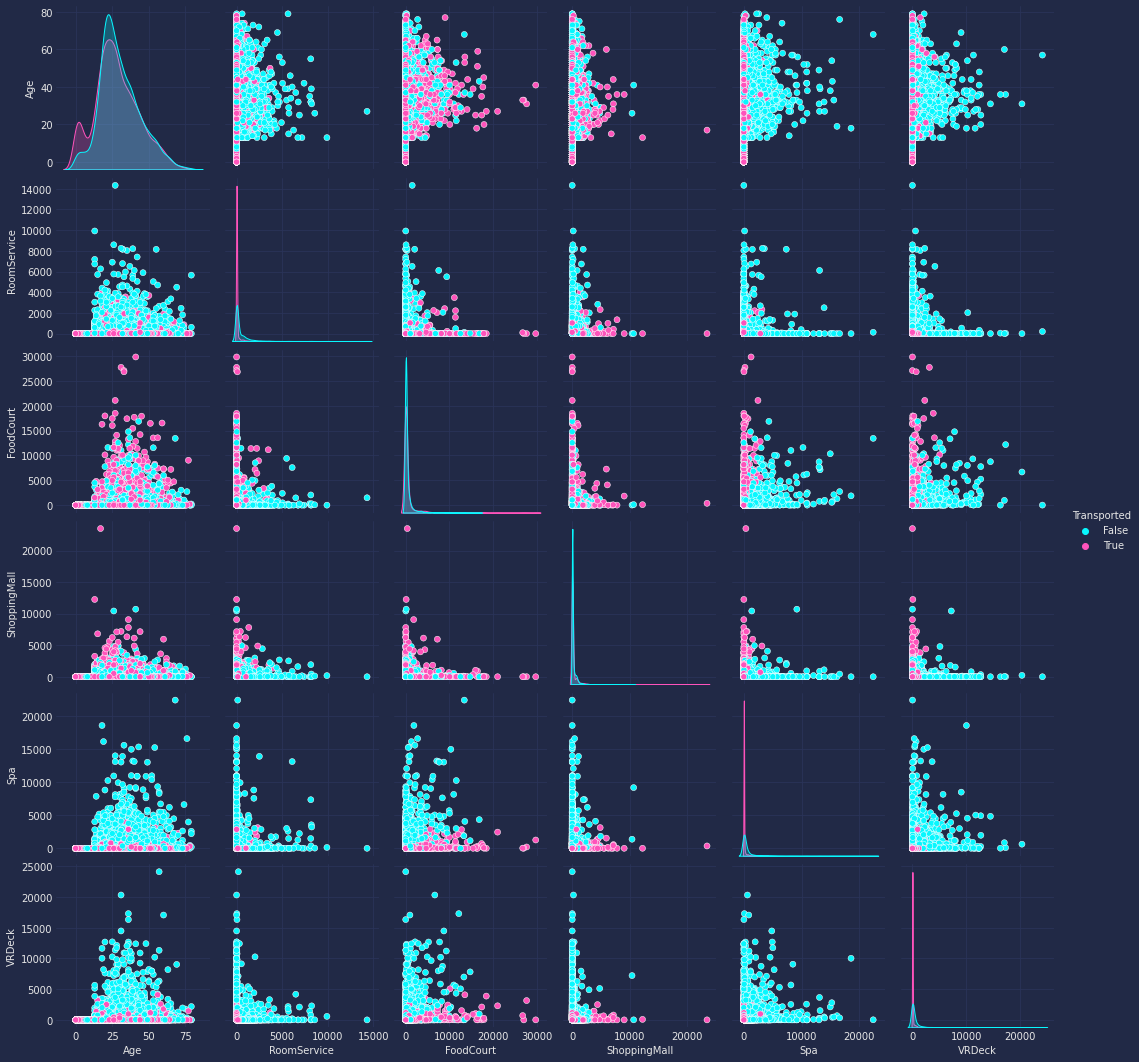

In [13]:
sns.pairplot(df_num, hue='Transported')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

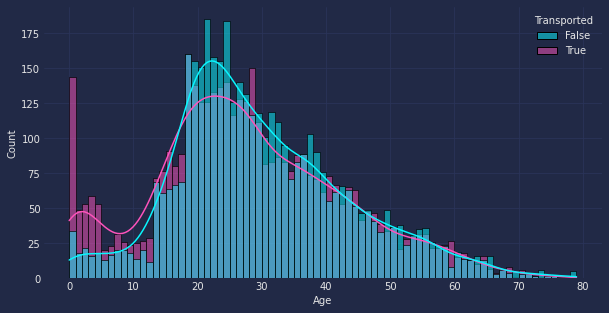

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x="Age", hue="Transported", binwidth=1, kde=True)

#### Observations
- Passengers (<18) were more likely to be transported than other age groups.
- Passengers (21-28) were less likely to be transported.
- Age seems to follow a normal distribution, but a little skewed to the right.

#### Decisions
- Complete the missing values in 'Age'
- Normalize our 'Age' distribution through data transformations.

For the other numerical variables, I chose to visualize their distributions through **[violin plots](https://mode.com/blog/violin-plot-examples/)** as it looked incomprehensible with histplots due to their overly skewed distributions.

To put simply, a **violin plot** is a combination of a box plot and a kernel density plot. No matter how I look at it, it doesn't look like a violin, but something else, ( ͡° ͜ʖ ͡°)

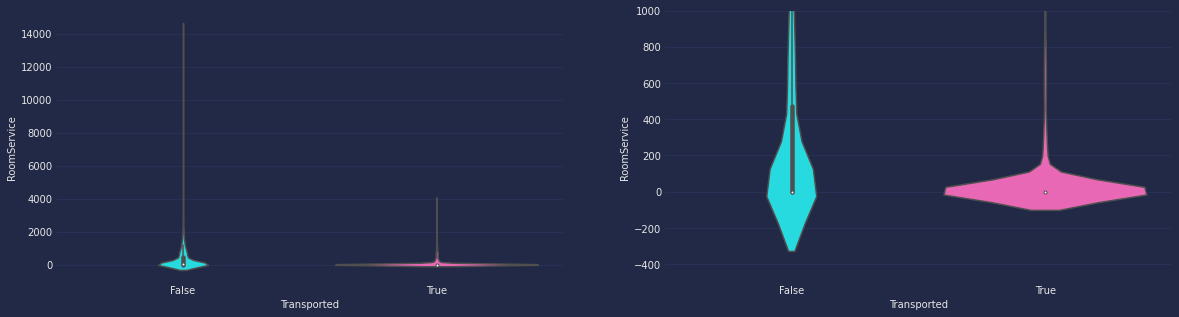

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df_num, x="Transported", y='RoomService')

plt.subplot(1,2,2)
sns.violinplot(data=df_num, x="Transported", y='RoomService')
plt.ylim([-500,1000])
plt.show()

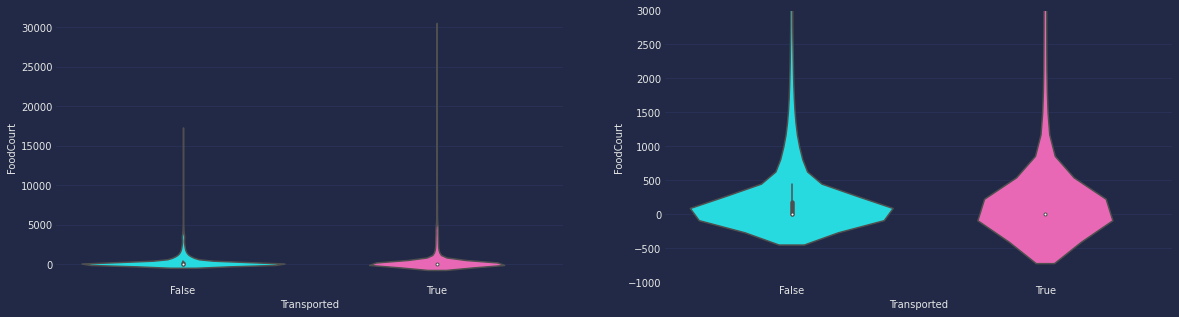

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df_num, x="Transported", y='FoodCourt')

plt.subplot(1,2,2)
sns.violinplot(data=df_num, x="Transported", y='FoodCourt')
plt.ylim([-1000,3000])
plt.show()

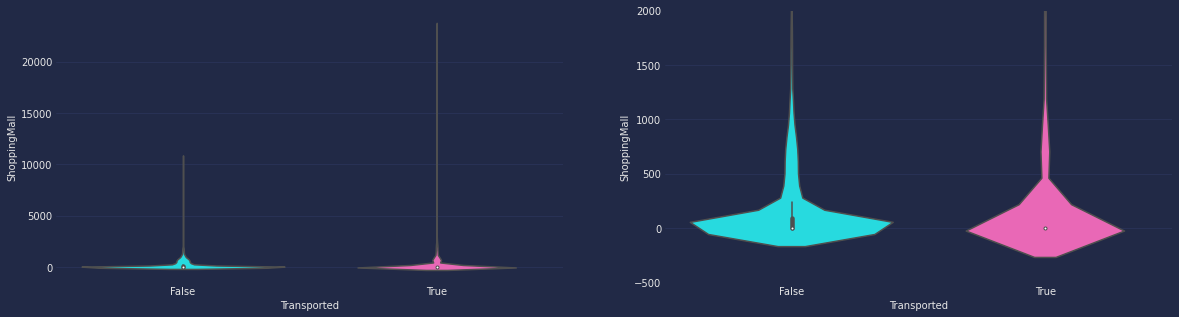

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df_num, x="Transported", y='ShoppingMall')

plt.subplot(1,2,2)
sns.violinplot(data=df_num, x="Transported", y='ShoppingMall')
plt.ylim([-500,2000])
plt.show()

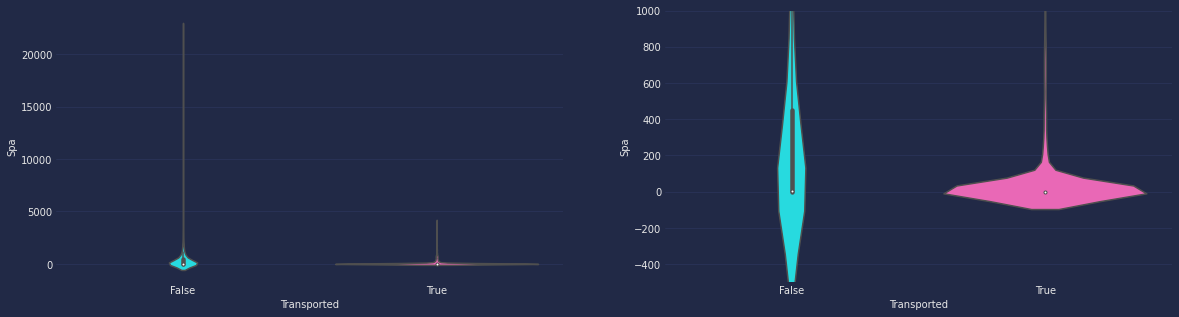

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df_num, x="Transported", y='Spa')

plt.subplot(1,2,2)
sns.violinplot(data=df_num, x="Transported", y='Spa')
plt.ylim([-500,1000])
plt.show()

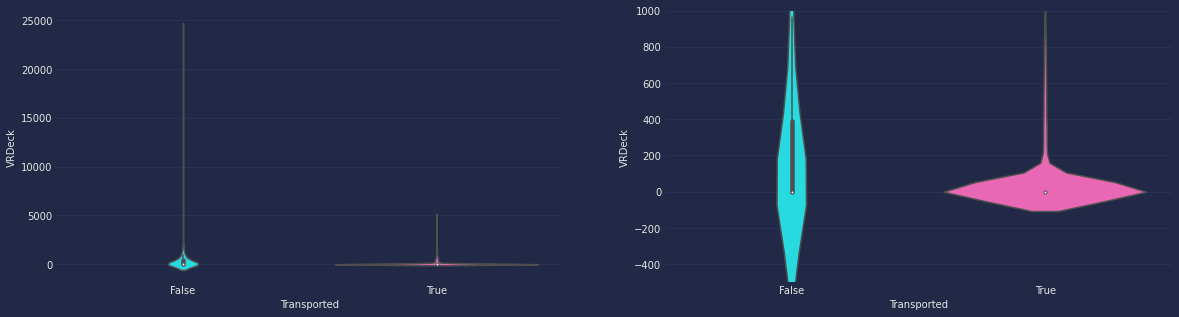

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df_num, x="Transported", y='VRDeck')

plt.subplot(1,2,2)
sns.violinplot(data=df_num, x="Transported", y='VRDeck', bin=.01)
plt.ylim([-500,1000])
plt.show()

#### Observations

- The distributions on RoomService, Spa, and VRDeck follow very similar patterns, the same is observed with those of FoodCourt and ShoppingMall.
- The bills spent by transported passengers appear to be concentrated and approaching to 0. Either they either very little to no amount at all.
- Most of the passengers who availed **RoomService, Spa,** and **VRDeck** services transported.
- Most of the passengers who availed **FoodCourt** and **ShoppingMall** services tend to be less likely to get transported.

#### Decisions

- Create a new feature called 'Premium' that sums the bills spent on **RoomService, Spa,** and **VRDeck**
- Create a new feature called 'Basic' feature that sums those from **FoodCourt** and **ShoppingMall**.
- Could this be associated with the VIP feature? That would be interesting to find out.

# Correlating Numerical Variables
This corr matrix will mark as our baseline to understand our numerical variables and see what we can play with for feature engineering. 

<AxesSubplot:>

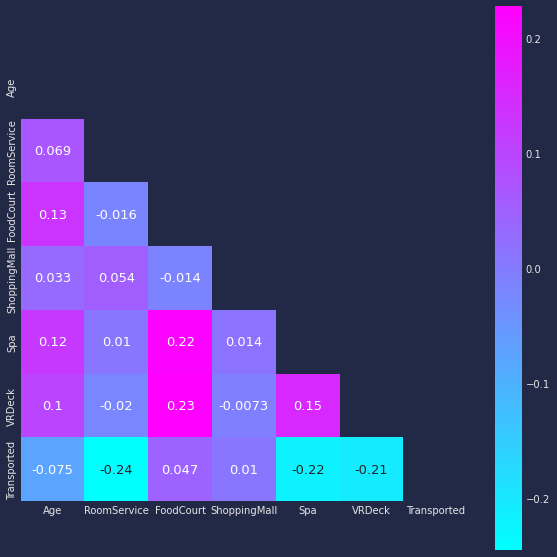

In [20]:
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, square=True)

#### Observations
- Despite following a normal distribution, *Age* has an underwhelmingly low correlation with 'Transported'.
- So far, *RoomService, Spa, and VRDeck* have some of the highest correlation with our target variable.

#### Decisions
- Create a categorical feature *AgeGroup* as a function of *Age*.

## Creating 'Basic', 'Premium' and 'All_Services' Features

<AxesSubplot:>

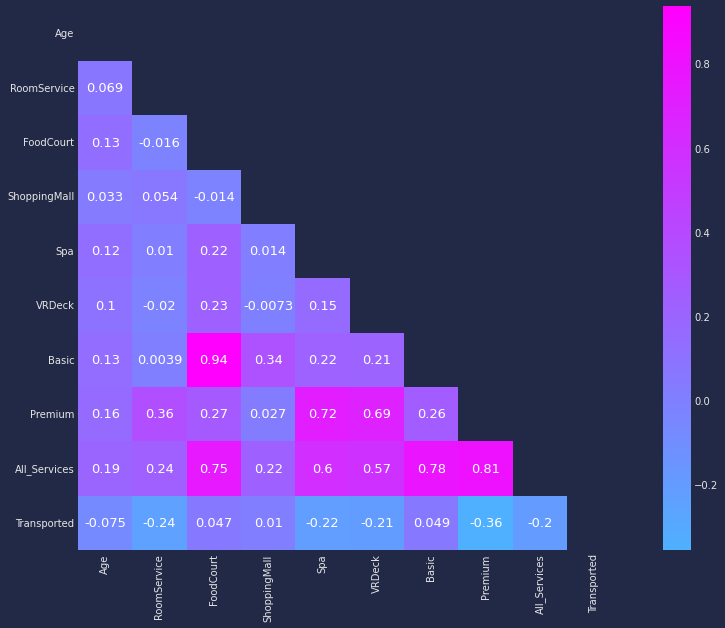

In [21]:
for dataset in df:
    dataset['Premium'] = dataset['RoomService'] + dataset['Spa'] + dataset['VRDeck']
    dataset['Basic'] = dataset['FoodCourt'] + dataset['ShoppingMall']
    dataset['All_Services'] = dataset['RoomService'] + dataset['Spa'] + dataset ['VRDeck'] + dataset['FoodCourt'] + dataset['ShoppingMall']

df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Basic', 'Premium', 'All_Services', 'Transported']]

plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

#### Decisions
- I am rooting *Premium* for now, since its correlation -0.36 seems promising. Should I choose to keep it, other features that are multicolliner with *Premium* will be removed.
- Let's try normalizing the highly skewed numerical features and see if it improves the correlation.

## Creating 'AgeGroup' Feature
Before classifying our 'Age' group into bins, we fill the missing values with mean as it follows normal distribution. 

In [22]:
# Divide 'Age' into four groups
for dataset in df:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['AgeGroup'] = pd.cut(dataset['Age'], 5)
    
train_df[['AgeGroup', 'Transported']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.475495
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [23]:
# Converting 'AgeGroup' into a Categorical Variable
for dataset in df:
    dataset.loc[dataset['Age'] <= 15, 'AgeGroupNum'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'AgeGroupNum'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'AgeGroupNum'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'AgeGroupNum'] = 3
    dataset.loc[(dataset['Age'] > 63), 'AgeGroupNum'] = 4

train_df['AgeGroupNum'].unique()

array([2., 1., 3., 0., 4.])

# Transforming Numerical Variables
The **probability plot** or [**quantile-quantile plot (QQplot)**](https://www.statisticshowto.com/q-q-plots/) allows us to plot our sample data against the quantiles of a normal distribution. In a nutshell, the objective is to have all the points lie along the line in the QQplot.

Before doing that, let's first fill up our missing numerical values with median.

In [24]:
for dataset in df:
    dataset['RoomService'] = dataset['RoomService'].fillna(train_df['RoomService'].median())
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(train_df['FoodCourt'].median())
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(train_df['ShoppingMall'].median())
    dataset['Spa'] = dataset['Spa'].fillna(train_df['Spa'].median())
    dataset['VRDeck'] = dataset['VRDeck'].fillna(train_df['VRDeck'].median())
    
    dataset['Premium'] = dataset['RoomService'] + dataset['Spa'] + dataset['VRDeck']
    dataset['Basic'] = dataset['FoodCourt'] + dataset['ShoppingMall']
    dataset['All_Services'] = dataset['RoomService'] + dataset['Spa'] + dataset ['VRDeck'] + dataset['FoodCourt'] + dataset['ShoppingMall']

import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()
    
df_services = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'All_Services', 'Transported']]

I will present the analysis the 'RoomService' feature as a working example for visualizing and interpreting the QQplots. As shown below is the baseline of the 'RoomService' 's distribution in the form of QQplot.

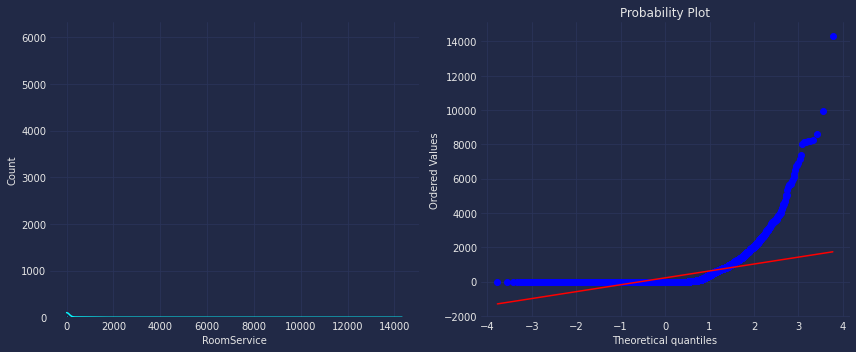

In [25]:
QQplot(df_services, 'RoomService')

Afterwards, we can proceed to transform our data and assess its fit in the QQplots once more. Here, I chose to try the following data transformations.
- square root
- cube root
- logarithmic ( log(x+1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

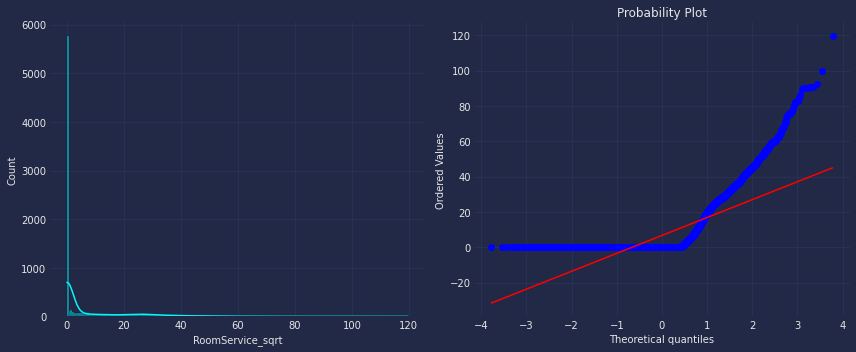

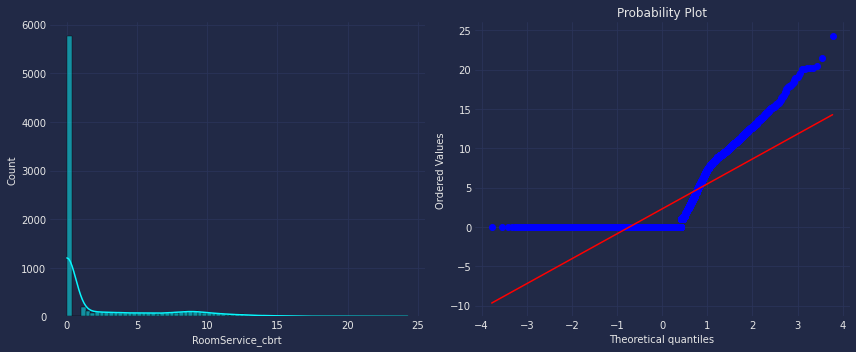

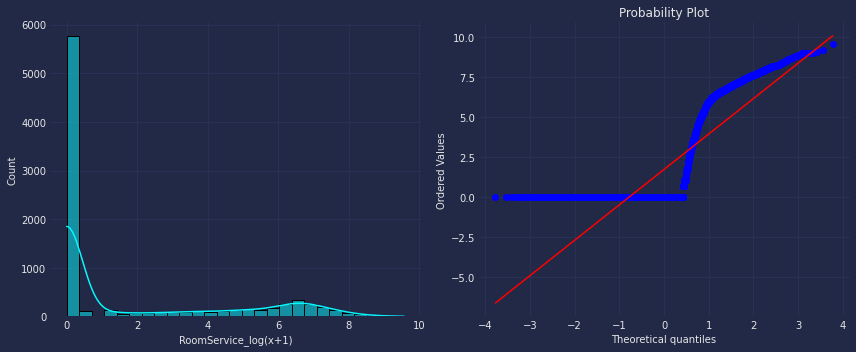

In [26]:
RoomService_tr = df_services[['RoomService', 'Transported']]

RoomService_tr["RoomService_sqrt"] = RoomService_tr['RoomService']**(1./2)
RoomService_tr["RoomService_cbrt"] = RoomService_tr['RoomService']**(1./3)
RoomService_tr["RoomService_log(x+1)"] = np.log(RoomService_tr['RoomService']+1)

QQplot(RoomService_tr, 'RoomService_sqrt')
QQplot(RoomService_tr, 'RoomService_cbrt')
QQplot(RoomService_tr, 'RoomService_log(x+1)')

After transformation, it is usually a good practice to check the correlation once more if there are any improvements. As shown below, the best performing transfortion **log(x+1)** improved the correlation from -0.24 to -0.36. 

<AxesSubplot:>

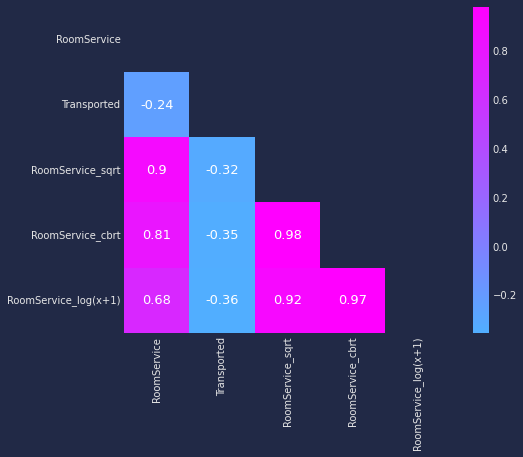

In [27]:
plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(RoomService_tr.corr()))
sns.heatmap(RoomService_tr.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

I can do the same technique with the rest of the features, but for now, I will apply log transformation on my remaining numerical features right away without having to go through this evaluation process as I already know that log transformation usually performs the best on highly skewed distributions.

<AxesSubplot:>

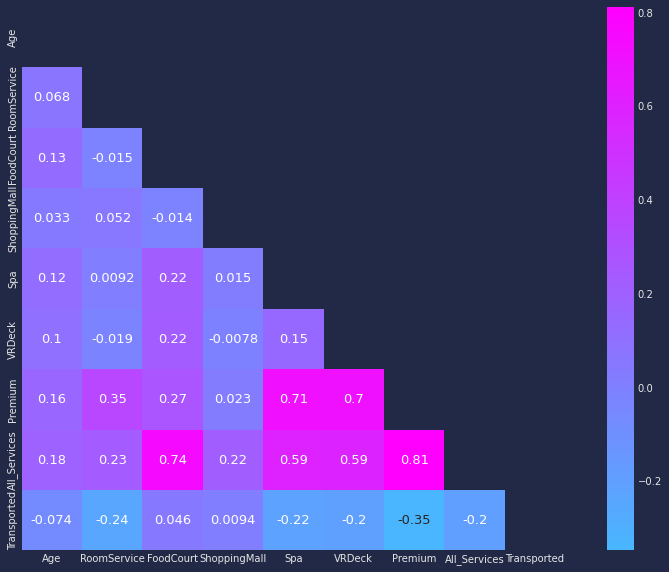

In [28]:
train_df_copy = train_df.copy()

train_df_copy['RoomService'] = np.log(train_df_copy['RoomService'] + 1)
train_df_copy['FoodCourt'] = np.log(train_df_copy['FoodCourt'] + 1)
train_df_copy['ShoppingMall'] = np.log(train_df_copy['ShoppingMall'] + 1)
train_df_copy['Spa'] = np.log(train_df_copy['Spa'] + 1)
train_df_copy['VRDeck'] = np.log(train_df_copy['VRDeck'] + 1)
train_df_copy['Premium'] = np.log(train_df_copy['Premium'] + 1)
train_df_copy['All_Services'] = np.log(train_df_copy['All_Services'] + 1)
    
df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'All_Services', 'Transported']]

plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

#### Observations
- It is more colorful.
- There is an issue here, although the correlation with our solution goal improved, this backfired because there are now many input features that become highly dependent with one another. This is also known as multicollinearity.

#### Decisions
- I want to keep *Premium* feature, so I need to remove *RoomService, Spa, and VRDeck* features to address multicollinearity.
- As for All_Services, we can try converting this into a categorical feature *Spent* where (1=spent, 0=didn't spend)

## Creating 'Spent' Feature

In [29]:
for dataset in df:
    dataset['Spent'] = 0
    dataset.loc[dataset['All_Services'] > 0, 'Spent'] = 1

# Categorical Variables

Before we visualize them, let's fill up our missing values in each feature with their corresponding **mode**, which is the most common label in the existing feature.

In [30]:
df_cat = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'AgeGroupNum', 'Spent']]

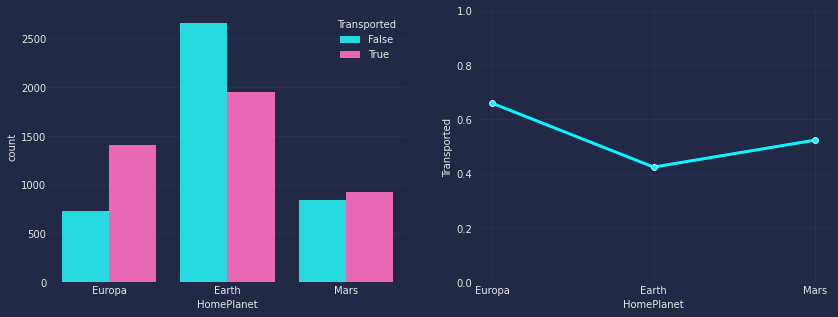

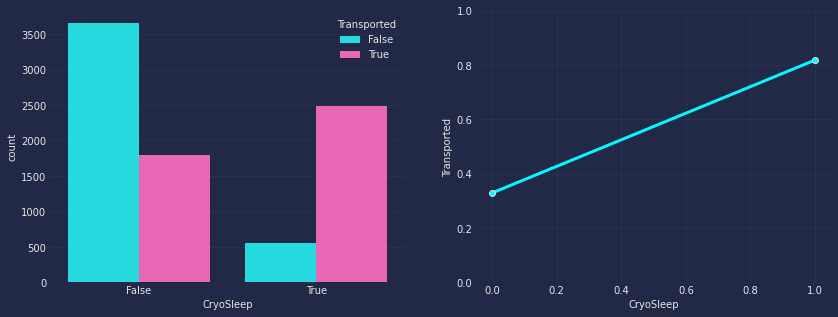

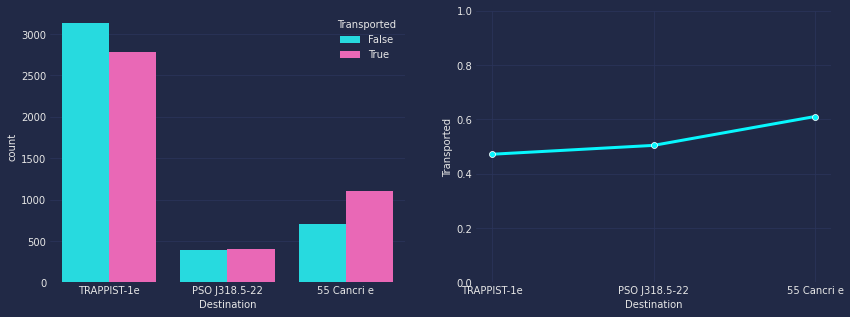

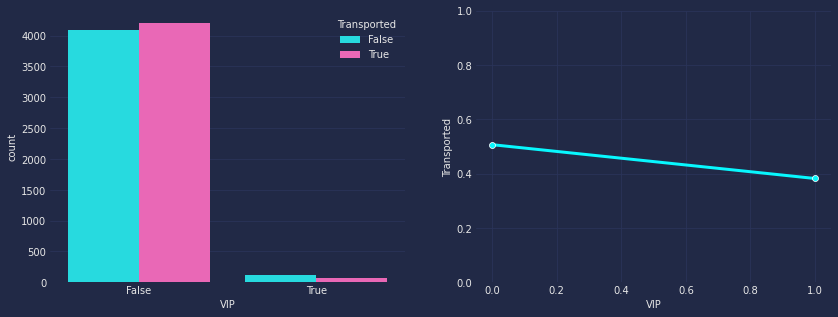

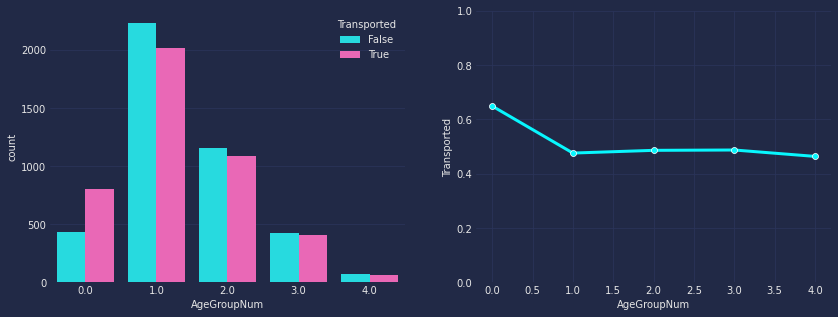

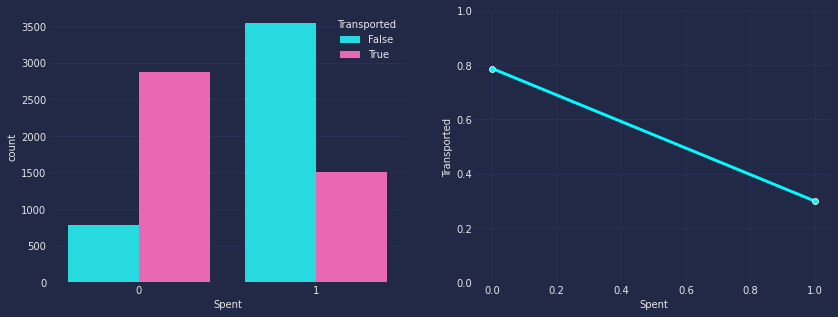

In [31]:
def Catplot(df, x, y):
    plt.subplots(1, 2, figsize = (14, 5))
    plt.subplot(1,2,1)
    sns.countplot( x=df[x].dropna(), hue=df[y])
        
    plt.subplot(1,2,2)
    plt.ylim(0,1)
    sns.lineplot( x=df[x], y=df[y], data=df, ci=None, linewidth=3, marker="o")
    plt.show()


Catplot(df_cat, 'HomePlanet', 'Transported')
Catplot(df_cat, 'CryoSleep', 'Transported')
Catplot(df_cat, 'Destination', 'Transported')
Catplot(df_cat, 'VIP', 'Transported')
Catplot(df_cat, 'AgeGroupNum', 'Transported')
Catplot(df_cat, 'Spent', 'Transported')

#### Observations

**HomePlanet**
- Most came from Earth as their home planet.
- Transport rate is highest with Europa, followed by Mars, then Earth.

**CryoSleep**
- Most passengers didn't undergo cryosleep.
- Those who underwent cryosleep had a higher transport rate.

**Destination**
- The most number of passengers seeked to debark to TRAPPIST-1e, followed 55 Cancri, then PSO.
- Highest transport rate at 55 Cancri, followed by PSO, then TRAPPIST-1e.

**VIP**
- Barely any members who subsribed to VIP service.
- Doesn't really resemble any association in terms of the transport rate.

**AgeGroupNum**
- Varying transport rates across the AgeGroupNum distribution. Higher transport rates among <15 yr old group relatively compared to the rest.

**Spent**
- Those who didn't spend were more likely to be transported.

# Mixed/Alphanumeric Variables
Let's extract relevant information from 'PassengerId', 'Cabin', and 'Name'
- **PassengerId** = gggg_pp (gggg=group, pp=number within group)
- **Cabin** = deck/num/side (side: P=Port, S=Starboard)
- **Name** = First Name + Last Name

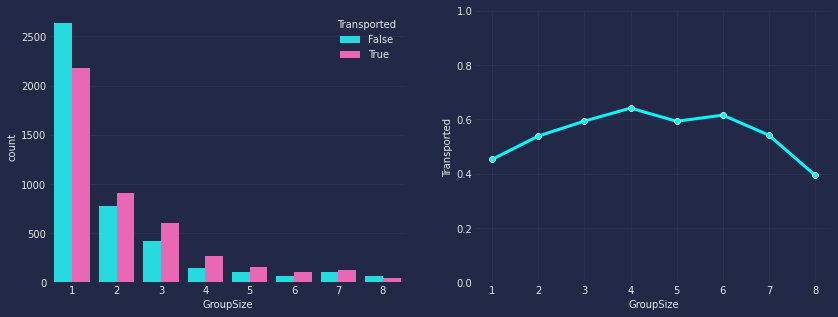

In [32]:
# Splitting PassengerId into 'Group' and 'GroupSize'

for dataset in df:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['GroupSize'] = dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

Catplot(train_df, 'GroupSize', 'Transported')

**GroupSize**
- Large number of passengers traveled alone, the volume exponentially decreases with larger group sizes.
- GroupSize of 4 followed by 6 had the highest transport rates.
- GroupSize of 8 followed by alone passengers had the lowest transport rates.

It apppears that a large number of passengers taveled alone. We can create a new categorical feature *withGroup* where (0=alone, 1=with group)

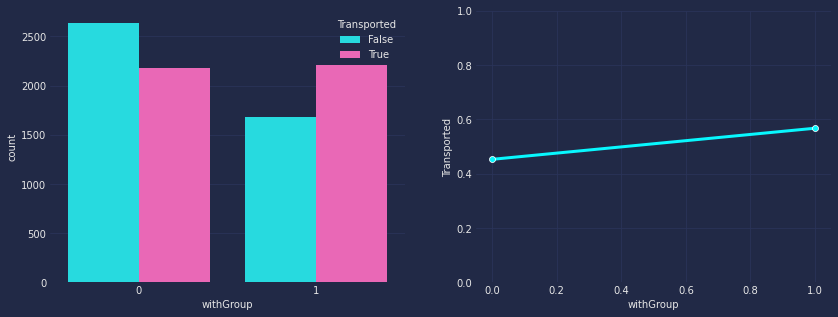

In [33]:
for dataset in df:
    dataset['withGroup'] = 1
    dataset.loc[dataset['GroupSize'] == 1, 'withGroup'] = 0

Catplot(train_df, 'withGroup', 'Transported')

**withGroup**
- Those who were with a group were likely to be transported by a small margin.

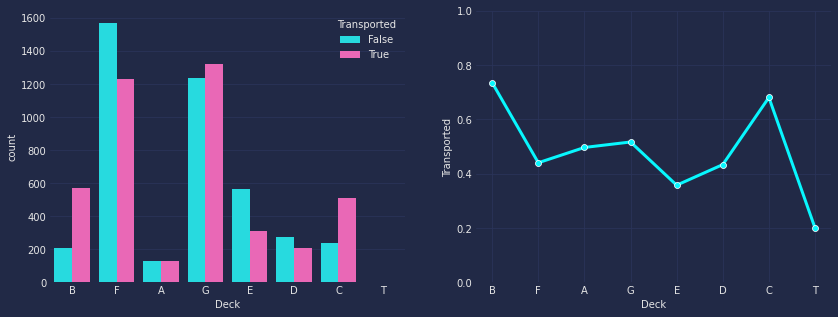

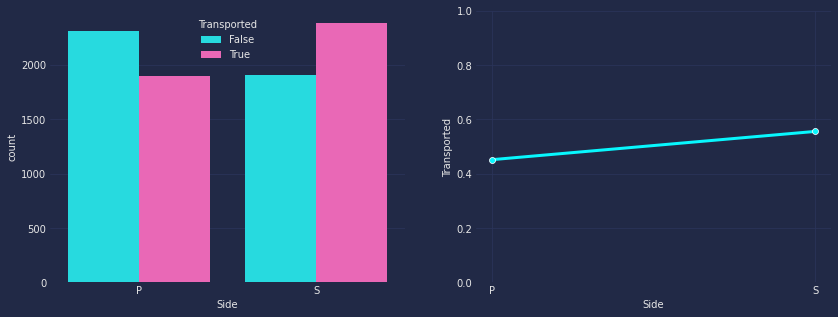

In [34]:
# Splitting Cabin into Deck, Num, and Side

for dataset in df:
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0] if (str(x)) != 'nan' else x)
    dataset['Num'] = dataset['Cabin'].apply(lambda x: x.split('/')[1] if (str(x)) != 'nan' else x)
    dataset['Side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2] if (str(x)) != 'nan' else x)

Catplot(train_df, 'Deck', 'Transported')
Catplot(train_df, 'Side', 'Transported')

#### Observations
**Deck**
- Majority of passengers resided in Cabins F and G.
- Highest transport rate among Cabin B passengers, followed by those of Cabin C.
- Lowest transort rate among Cabin T passengers, but data is not representative enough.

**Side**
- Side S dominates transport rate by a small margin over Side P.

In [35]:
# Splitting Name into First and Last Names
for dataset in df:
    dataset['FirstName'] = dataset['Name'].apply(lambda x: x.split(' ')[0] if (str(x)) != 'nan' else x)
    dataset['LastName'] = dataset['Name'].apply(lambda x: x.split(' ')[1] if (str(x)) != 'nan' else x)

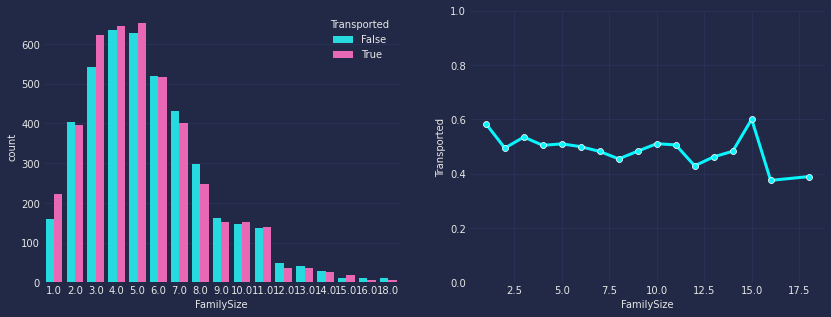

In [36]:
# Creating 'FamilySize' from 'LastName'
for dataset in df:
    dataset['FamilySize'] = dataset['LastName'].map(lambda x: dataset['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)
    
Catplot(train_df, 'FamilySize', 'Transported')

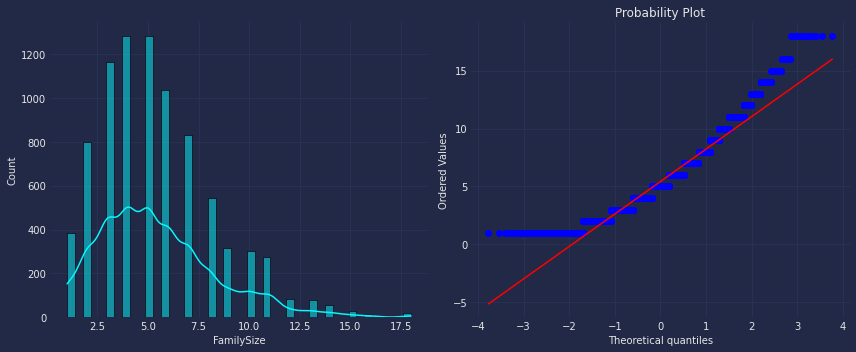

In [37]:
QQplot(train_df, 'FamilySize')

**FamilySize**
- Distribution is skewed to the right.
- FamilySizes of 3, 4, and 5 comprise the majority.
- Transport rate appears to steadily decline with increasing FamilySize, but with the exception of FamilySize 15.

#### Decisions
- This can be treated as a numerical feature because it seems to have a linear relationship with our solution goal.

## Normalizing 'FamilySize'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

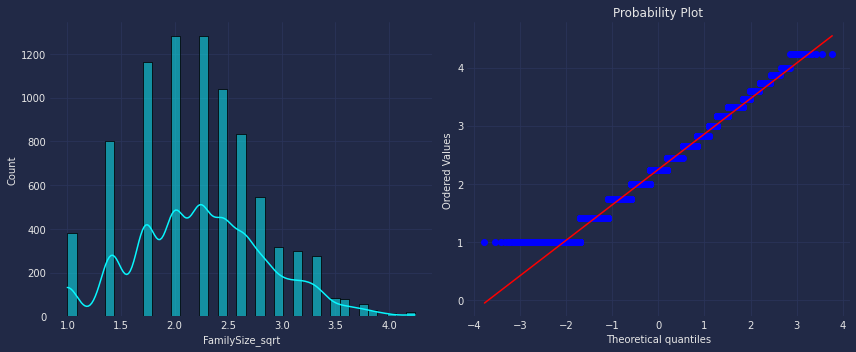

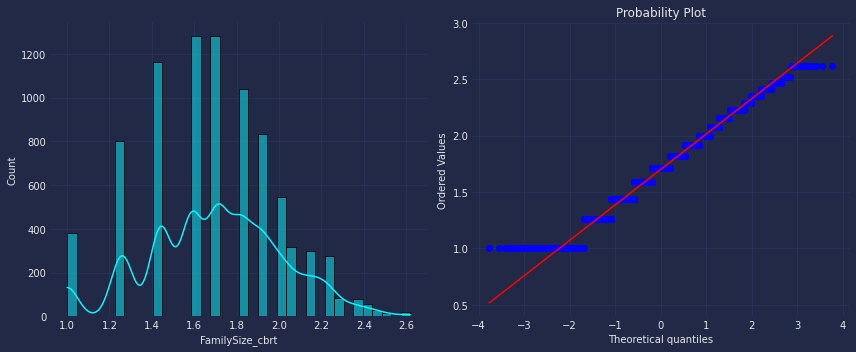

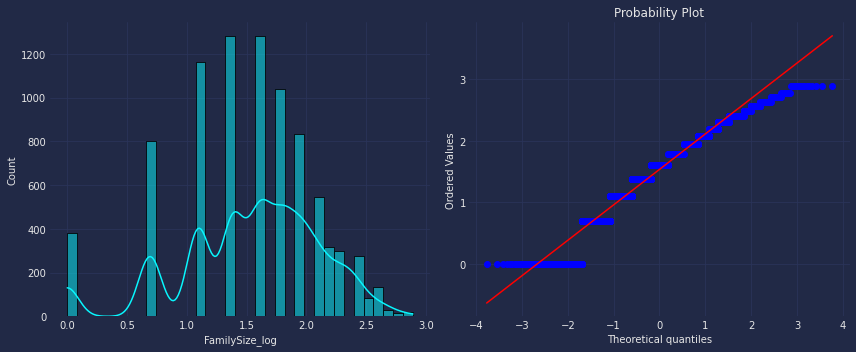

In [38]:
FamilySize_tr = train_df[['FamilySize', 'Transported']]

FamilySize_tr["FamilySize_sqrt"] = FamilySize_tr['FamilySize']**(1./2)
FamilySize_tr["FamilySize_cbrt"] = FamilySize_tr['FamilySize']**(1./3)
FamilySize_tr["FamilySize_log"] = np.log(FamilySize_tr['FamilySize'])

QQplot(FamilySize_tr, 'FamilySize_sqrt')
QQplot(FamilySize_tr, 'FamilySize_cbrt')
QQplot(FamilySize_tr, 'FamilySize_log')

This is one of the circumstances where log transform performed poorly. Sqrt transformation yielded the best fit. With that out of the way, we can proceed to transform our data for real.

In [39]:
to_log_transform = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'Basic', 'All_Services']

# Log Transform Num Values
for dataset in df:
    for i in to_log_transform:
        dataset[i] = np.log(dataset[i]+1)

# Associating Categorical Variables

In terms of statistics terminologies, it is not usually appropriate to use the term *correlation* when testing with categorical variables. We can't really assess the magnitude or the strength of correlation between predictor and response categorical variables, unless if they are either dichotomous (categorical variables having 2 categories like 'Sex') or ordinal variables then it is allowed to use **Pearson's correlation.**
> This means that we can still evaluate *CryoSleep, VIP* against our target *Transported* with Pearson's correlation.

The rest of our categorical features are either non-ordinal or contain more than 2 categories. Instead of conducting correlation tests, it is more appropriate to use tests of independency to assess the strength of association between cateorical variables. The one I will use is Cramer's V correlation, which is based from **[Chi-square test](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.).**

The intention to using Cramer's V over the usual Chi-square is that it applies to categorical variables with two or more labels. For the sake of uniformity, I will apply the correlation among my dichotomous variabes as well (i.e. *CryoSleep, VIP*).

Before we can conduct Chi-square tests, we must ensure that our categorical data are numerically encoded first using `LabelEncoder()`.

In [40]:
# Encoding categorical labels
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

df1 = train_df.copy()

df_cat = df1[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroupNum', 'Spent', 'Group', 'withGroup', 'Deck', 'Num', 'Side', 'LastName', 'Transported']]

label = LabelEncoder()
df_cat_encoded = pd.DataFrame()

for i in df_cat.columns:
    df_cat_encoded[i] = label.fit_transform(df_cat[i])
    
df_cat_encoded.head()

,HomePlanet,CryoSleep,Destination,VIP,AgeGroupNum,Spent,Group,withGroup,Deck,Num,Side,LastName,Transported
0,1,0,2,0,2,0,0,0,1,0,0,1431,0
1,0,0,2,0,1,1,1,0,5,0,1,2109,1
2,1,0,2,1,3,1,2,1,0,0,1,1990,0
3,1,0,2,0,2,1,2,1,0,0,1,1990,0
4,0,0,2,0,1,1,3,0,5,1,1,1778,1


In [41]:
from scipy.stats.contingency import association       
    
def Cramers_V(var1, var2) :
  crosstab = np.array(pd.crosstab(index=var1, columns=var2)) # Cross Tab
  return (association(crosstab, method='cramer'))            # Return Cramer's V

# Create the dataFrame matrix with the returned Cramer's V
rows = []

for var1 in df_cat_encoded:
    col = []

    for var2 in df_cat_encoded:
        V = Cramers_V(df_cat_encoded[var1], df_cat_encoded[var2]) # Return Cramer's V
        col.append(V)                                             # Store values to subsequent columns  
    rows.append(col)                                              # Store values to subsequent rows
  
CramersV_results = np.array(rows)
CramersV_df = pd.DataFrame(CramersV_results, columns = df_cat_encoded.columns, index = df_cat_encoded.columns)

<AxesSubplot:>

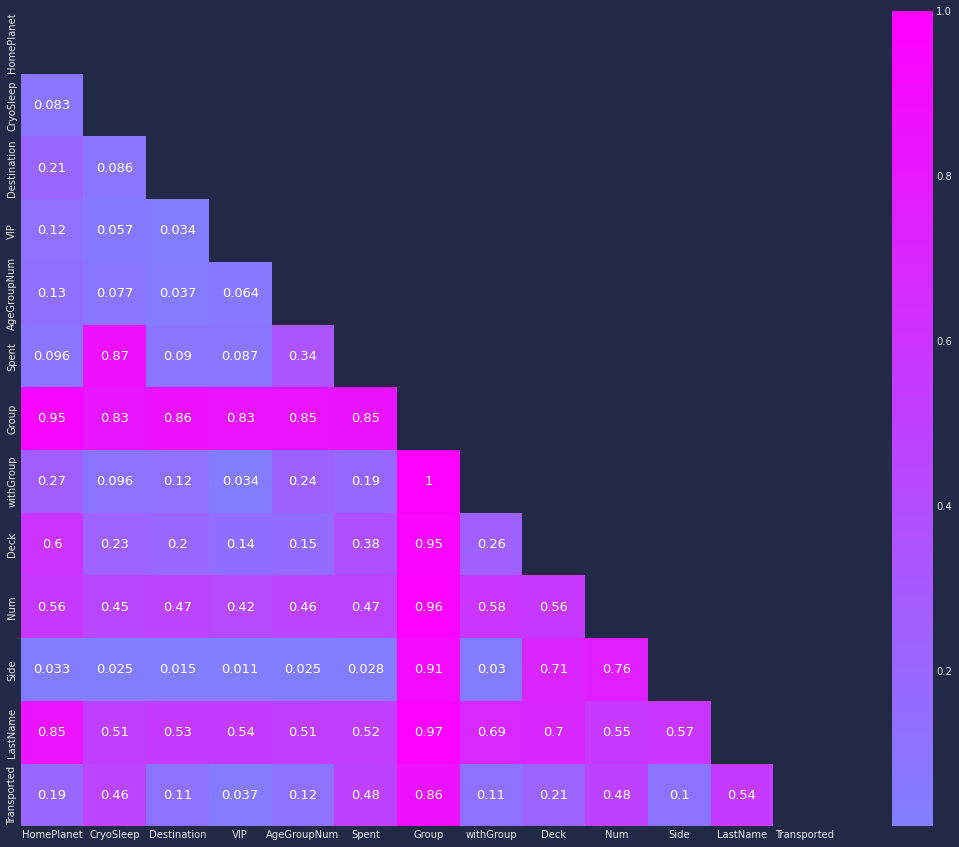

In [42]:
plt.subplots(figsize=(20,15))
corr = np.corrcoef(np.random.randn(13, 13))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(CramersV_df, mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

**Observations.** There is a lot to dig in here because my approach to feature engineering was rather exhaustive. As a result, multicollinearity tend to occur, this happens when two or more independent variables are highly associated with one another, rendering them redundant.

This association matrix will actually help us later on by filling up missing categorical values based on correlated features.

# Missing Values

By answering these questions, we also stand to gain relevant insights and patterns which we can apply to our imputation method. Guess what, since we created our association matrix above, we already know which features and other correspoding interrelated features to look out for. Below are just some questions that we are particularly interested in.

- **PassengerId group vs Name** (last name). Assuming they are family, it is more probable that most have similar last names.
- **PassengerId group** (gggg=group, pp=number) **vs HomePlanet and Destination.** Did passengers within their groups travel together, which means coming from the same HomePlanet and debarking to the same Destination.
- **PassengerId group vs Cabin**. Do people of the same group stay in the same cabin?
- **Cryosleep vs Cabin.** Does a cryosleep facility have its designated cabin area?
- **CryoSleep vs Services.** Did passengers who elected to cryosleep have lower expenditures?
- **CryoSleep vs withGroup.** Were those who traveled alone in the group likely to undergo CryoSleep?
- **CryoSleep vs HomePlanet and Destination.** Is there a pattern among passengers who cryoslept with respect to longer travels (can possibly infer that distances are farther between HomePlanet vs Destination)
- **VIP vs Services.** How the services and expenditures from VIP members differ from non-VIPs?

In [43]:
# Define function to impute based on a feature
def impute_cat(var1, var2):
    print('Before %s Train:' %var2, train_df[var2].isnull().sum())
    print('Before %s Test:' %var2, test_df[var2].isnull().sum())

    test_df['Transported'] = np.NaN
    df_full = pd.concat([train_df, test_df])

    reference = df_full.groupby([var1, var2])[var2].size().unstack().fillna(0)

    for dataset in df:          
        index = dataset[dataset[var2].isnull()][(dataset.loc[dataset[var2].isnull()][var1]).isin(reference.index)].index
        dataset.loc[index, var2] = dataset.loc[index, var1].map(lambda x: reference.idxmax(axis=1)[x])
    
    print('After %s Train:' %var2, train_df[var2].isnull().sum())
    print('After %s Test:' %var2, test_df[var2].isnull().sum())
    print('\n')

### Imputing CryoSleep

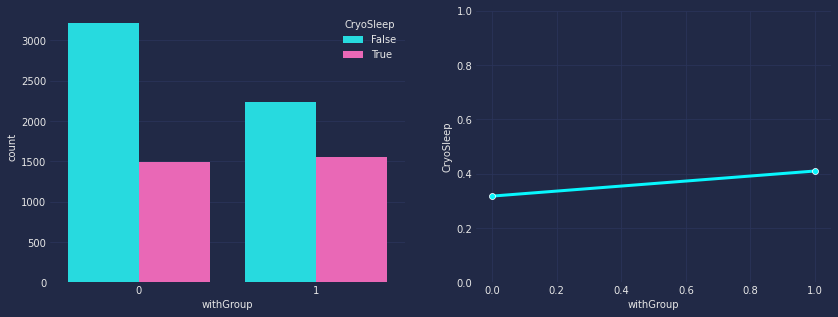

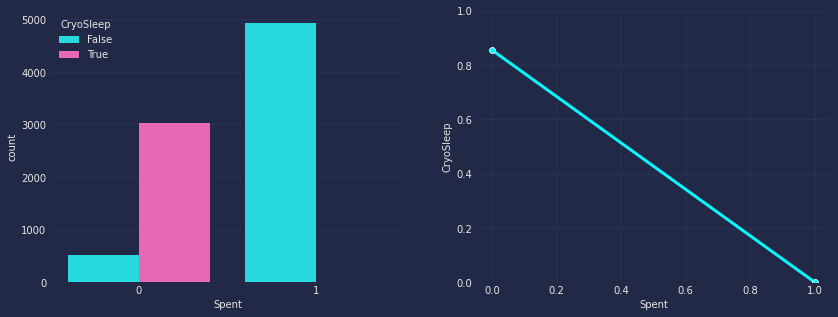

In [44]:
Catplot(train_df, 'withGroup', 'CryoSleep')
Catplot(train_df, 'Spent', 'CryoSleep')

**Conclusion.** Since Cryosleep is strongly associted with Spent, we will impute Cryosleep as False if Spent is Spent is 1, then True otherwise.

In [45]:
print('Before Train:', train_df['CryoSleep'].isnull().sum())
print('Before Test:', test_df['CryoSleep'].isnull().sum())

for dataset in df:
    dataset.loc[(dataset.CryoSleep.isnull()) & (dataset.Spent == 0), 'CryoSleep' ] = True
    dataset.loc[(dataset.CryoSleep.isnull()) & (dataset.Spent == 1), 'CryoSleep' ] = False


print('After Train:', train_df['CryoSleep'].isnull().sum())
print('After Test:', test_df['CryoSleep'].isnull().sum())

Before Train: 217
Before Test: 93
After Train: 0
After Test: 0


In [46]:
train_df.CryoSleep.unique()

array([False, True], dtype=object)

### Imputing VIP

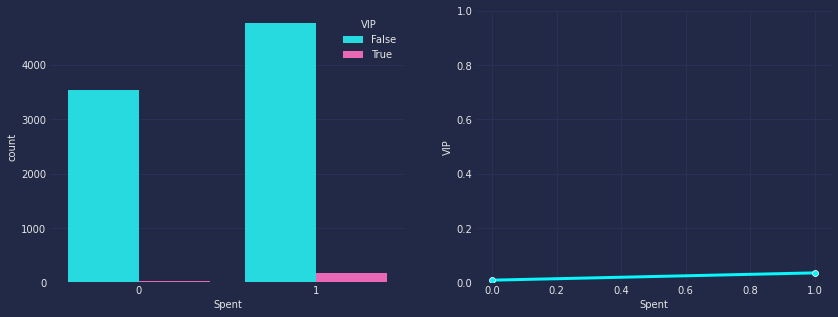

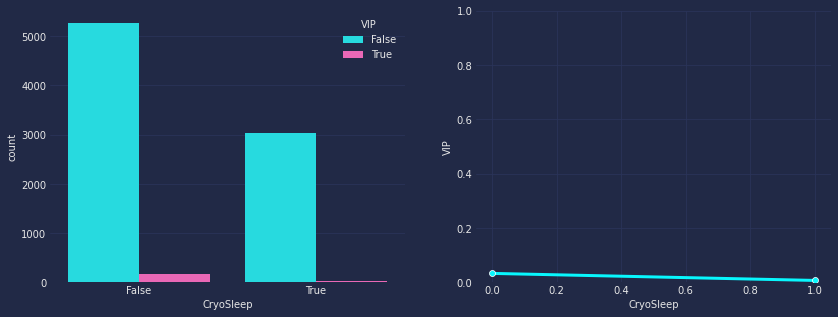

In [47]:
Catplot(train_df, 'Spent', 'VIP')
Catplot(train_df, 'CryoSleep', 'VIP')

<AxesSubplot:xlabel='VIP', ylabel='Premium'>

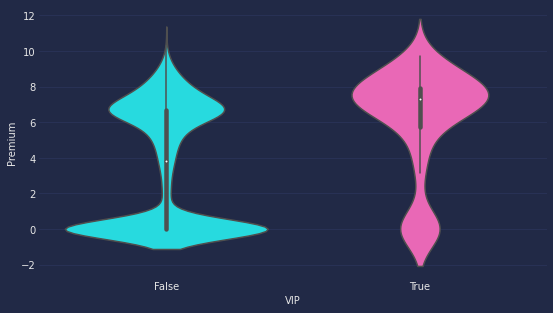

In [48]:
# How VIP spend on services
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=train_df, x="VIP", y='Premium')

**Observation.** It appears that VIP passengers tend to spend more on premium services. For now, I will impute by mode.

In [49]:
print('Before Train:', train_df['VIP'].isnull().sum())
print('Before Test:', test_df['VIP'].isnull().sum())

for dataset in df:
    dataset['VIP'].fillna(False, inplace=True)
    
print('After Train:', train_df['VIP'].isnull().sum())
print('After Test:', test_df['VIP'].isnull().sum())

Before Train: 203
Before Test: 93
After Train: 0
After Test: 0


### Imputing Cabin Deck and Side

In [50]:
CD_PG = train_df.groupby(['Group', 'Deck'])['Deck'].size().unstack().fillna(0)
CD_PG.head(10)

Deck,A,B,C,D,E,F,G,T
Group,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Conclusion.** We discovered that passengers of the same group stay in the same cabin deck.

In [51]:
# Imputing Deck
impute_cat('Group', 'Deck')
impute_cat('Group', 'Side')

Before Deck Train: 199
Before Deck Test: 100
After Deck Train: 99
After Deck Test: 63


Before Side Train: 199
Before Side Test: 100
After Side Train: 99
After Side Test: 63




**Decision.** Impute *Deck* based on 2nd most highly associated feature *LastName*. Navigate [here](#impute-deck-lastname).

### Imputing Homeplanet and Destination

In [52]:
HP_PG = train_df.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
HP_PG.head(10)

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,2.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,3.0,0.0
9,0.0,0.0,1.0


In [53]:
D_PG = train_df.groupby(['Group', 'Destination'])['Destination'].size().unstack().fillna(0)
D_PG.head(10)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Group,,,
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,2.0
7,0.0,0.0,1.0
8,2.0,0.0,1.0
9,0.0,0.0,1.0


**Conclusion.** The passengers within each group have the same HomePlanet and Destinations. Given this premise, we can impute missing values in HomePlanet by returning the column name (Earth, Europa, Mars) with the positive number of passengers, as a function of 'Group'. The same imputation process can be done for missing values in 'Destination'.

In [54]:
# Impute HomePlanet and Destination
impute_cat('Group', 'HomePlanet')
impute_cat('Group', 'Destination')

Before HomePlanet Train: 201
Before HomePlanet Test: 87
After HomePlanet Train: 111
After HomePlanet Test: 46


Before Destination Train: 182
Before Destination Test: 92
After Destination Train: 103
After Destination Test: 51




There are still remaining missing values that weren't filled, so my strategy now is to  impute them based on the succeeding features that are highly associated to *HomePlanet* and *Destination.*

**Decision.** Impute *HomePlanet* and *Destination* based from 2nd most associated feature *LastName*

In [55]:
LN_HP = train_df.groupby(['LastName', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
LN_HP.head(10)

HomePlanet,Earth,Europa,Mars
LastName,,,
Acobson,4.0,0.0,0.0
Acobsond,3.0,0.0,0.0
Adavisons,9.0,0.0,0.0
Adkinson,3.0,0.0,0.0
Admingried,0.0,4.0,0.0
Aginge,0.0,1.0,0.0
Ailled,0.0,2.0,0.0
Aillyber,0.0,3.0,0.0
Aiming,0.0,1.0,0.0


In [56]:
impute_cat('LastName', 'HomePlanet')
impute_cat('LastName', 'Destination')

Before HomePlanet Train: 111
Before HomePlanet Test: 46
After HomePlanet Train: 8
After HomePlanet Test: 5


Before Destination Train: 103
Before Destination Test: 51
After Destination Train: 4
After Destination Test: 2




**Decision.** Impute *HomePlanet* and *Destination* based from 3rd most associated feature *Deck*

In [57]:
CD_HP = train_df.groupby(['Deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
CD_HP.head(10)

HomePlanet,Earth,Europa,Mars
Deck,,,
A,0.0,261.0,0.0
B,0.0,796.0,0.0
C,0.0,760.0,0.0
D,0.0,195.0,291.0
E,406.0,135.0,344.0
F,1656.0,0.0,1150.0
G,2587.0,0.0,0.0
T,0.0,5.0,0.0


In [58]:
impute_cat('Deck', 'HomePlanet')
impute_cat('Deck', 'Destination')

Before HomePlanet Train: 8
Before HomePlanet Test: 5
After HomePlanet Train: 0
After HomePlanet Test: 0


Before Destination Train: 4
Before Destination Test: 2
After Destination Train: 0
After Destination Test: 0




### Analyzing Cabin Deck, Side vs HomePlanet and Destination

In [59]:
HP_D_CS_CD = train_df.groupby(['HomePlanet', 'Destination', 'Spent', 'Deck'])['Deck'].size().unstack().fillna(0)
HP_D_CS_CD.head(20)

Deck                               A      B      C      D      E       F  \
HomePlanet Destination   Spent                                             
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0    4.0     6.0   
                         1       0.0    0.0    0.0    0.0   45.0   271.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    3.0     5.0   
                         1       0.0    0.0    0.0    0.0   26.0   224.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0   19.0    14.0   
                         1       0.0    0.0    0.0    0.0  309.0  1140.0   
Europa     55 Cancri e   0      39.0  217.0  160.0   32.0   26.0     0.0   
                         1      75.0  133.0  169.0   36.0   24.0     0.0   
           PSO J318.5-22 0       1.0    1.0    7.0    0.0    0.0     0.0   
                         1       1.0    2.0    7.0    0.0    0.0     0.0   
           TRAPPIST-1e   0      52.0  263.0  162.0   43.0   32.0     0.0   
                         1      94.0  180.0  256.0   84.0   53.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   12.0    7.0    78.0   
                         1       0.0    0.0    0.0   36.0   14.0    53.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    9.0     4.0   
                         1       0.0    0.0    0.0   17.0    4.0    16.0   
           TRAPPIST-1e   0       0.0    0.0    0.0   24.0  138.0   554.0   
                         1       0.0    0.0    0.0  203.0  172.0   445.0   

Deck                                 G    T  
HomePlanet Destination   Spent               
Earth      55 Cancri e   0       283.0  0.0  
                         1        94.0  0.0  
           PSO J318.5-22 0       375.0  0.0  
                         1        93.0  0.0  
           TRAPPIST-1e   0      1042.0  0.0  
                         1       701.0  0.0  
Europa     55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  5.0  
Mars       55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  0.0

<AxesSubplot:xlabel='Deck', ylabel='HomePlanet-Destination-Spent'>

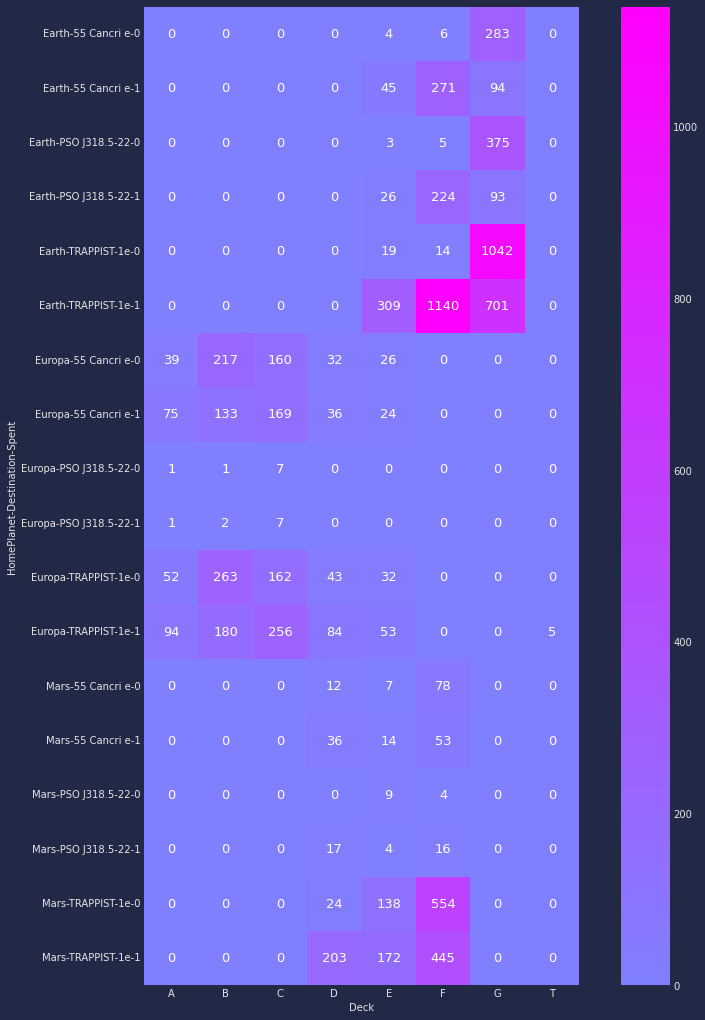

In [60]:
plt.subplots(figsize=(15,18))
sns.heatmap(HP_D_CS_CD, cmap='cool', annot=True, annot_kws={"fontsize":13}, fmt='g', center=0, square=True)

**Conclusion.** Out of all the comparisons, HomePlanet-Destination-Spent vs CabinDeck yielded the best patterns.
- Cabins E, F, and G are mostly reserved by passengers that embarked from Earth.
- Cabins A, B, C, D, and E resereved by those that embarked from Europa.
- Cabins D, E, and F resereved by those that embarked from Mars.

If you are interested, you may check the proposed solution in Stackoverflow [HERE](https://stackoverflow.com/questions/45741879/can-i-replace-nans-with-the-mode-of-a-column-in-a-grouped-data-frame) if you want to proceed the imputation. No matter how I editted and approached, I wasn't able to make it work : (

### Imputing Surname and Family Size
- Passengers of the same group are likely to be families (having the same surnames)
- The purpose of filling up *LastName* is to update the missing data in *FamilySize* later on.

In [61]:
PG_SN = train_df.groupby(['Group', 'LastName'])['LastName'].size().fillna(0)
PG_SN.head(20)

Group  LastName   
1      Ofracculy      1
2      Vines          1
3      Susent         2
4      Santantines    1
5      Hinetthews     1
6      Jacostaffey    2
7      Beston         1
8      Flatic         3
9      Barne          1
10     Baketton       1
11     Bertsontry     1
12     Pooles         1
14     Eccle          1
15     Hughriend      1
16     Upead          1
17     Brighttt       2
20     Brantuarez     3
       Jacostanley    1
       Mcfaddennon    2
24     Fullided       1
Name: LastName, dtype: int64

**Decision.** It appears that most, but not all the passengers in the group have the same surnames, as in the case of Group 20, so we can just impute as the *LastName* with the highest occurences.

In [62]:
impute_cat('Group', 'LastName')

Before LastName Train: 200
Before LastName Test: 94
After LastName Train: 104
After LastName Test: 51




**Decision.** Impute *LastName* based on 2nd most highly associated feature *HomePlanet*

In [63]:
impute_cat('HomePlanet', 'LastName')

Before LastName Train: 104
Before LastName Test: 51
After LastName Train: 0
After LastName Test: 0




In [64]:
# Update the 'FamilySize' column and apply sqrt transform
for dataset in df:
    dataset['FamilySize'] = dataset['LastName'].map(lambda x: dataset['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)
    dataset['FamilySize'] = dataset['FamilySize']**(1./2)
    dataset['GroupSize'] = np.log(dataset['GroupSize'])

<a id="impute-deck-lastname"></a>
**Decision.** Impute remaining missing *Deck* and *Side* based on *LastName*, followed by *HomePlanet*.

In [65]:
impute_cat('LastName', 'Deck')
impute_cat('HomePlanet', 'Deck')

impute_cat('LastName', 'Side')
impute_cat('HomePlanet', 'Side')

Before Deck Train: 99
Before Deck Test: 63
After Deck Train: 4
After Deck Test: 0


Before Deck Train: 4
Before Deck Test: 0
After Deck Train: 0
After Deck Test: 0


Before Side Train: 99
Before Side Test: 63
After Side Train: 4
After Side Test: 0


Before Side Train: 4
Before Side Test: 0
After Side Train: 0
After Side Test: 0




We want finalize if our missing data have all been filled before we proceed to preprocessing.

In [66]:
missing_values(train_df)

,Feature,Missing Values,Missing Percentage (%)
26,FirstName,200,2.30
12,Name,200,2.30
3,Cabin,199,2.29
24,Num,199,2.29
0,PassengerId,0,0.00
16,All_Services,0,0.00
27,LastName,0,0.00
25,Side,0,0.00
23,Deck,0,0.00
22,withGroup,0,0.00


In [67]:
missing_values(test_df)

,Feature,Missing Values,Missing Percentage (%)
28,Transported,4277,100.00
3,Cabin,100,2.34
23,Num,100,2.34
25,FirstName,94,2.20
12,Name,94,2.20
16,AgeGroup,0,0.00
27,FamilySize,0,0.00
26,LastName,0,0.00
24,Side,0,0.00
22,Deck,0,0.00


I will be dropping variables that are highly cardinal, weakly correlated/associated with the target variable, and multicollinearity-inducing.

In [68]:
train_df.dtypes

# Change VIP data type from bool to object
for dataset in df:
    dataset['VIP'] = dataset['VIP'].astype(object)

In [69]:
test_df.drop('Transported', axis=1, inplace=True)

In [70]:
y = train_df['Transported'].copy()
X = train_df.copy()

X_test = test_df.copy()

# Create df for preprocessing later
df_prep = [X, X_test]

# Data Preprocessing

In [71]:
# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Select numerical columns
num_cols = [cname for cname in train_df.columns if 
                train_df[cname].dtype in ['float64']]

# Select categorical columns
cat_cols = [cname for cname in train_df.columns if
                    train_df[cname].nunique() < 10 and 
                    (train_df[cname].dtype == "object")]

scale = StandardScaler()
label = LabelEncoder()

# Scale num features
X[num_cols] = scale.fit_transform(X[num_cols])
X_test[num_cols] = scale.transform(X_test[num_cols])

# Label encode cat features
for dataset in df_prep:
    for i in cat_cols:
        dataset[i] = label.fit_transform(dataset[i])

<AxesSubplot:>

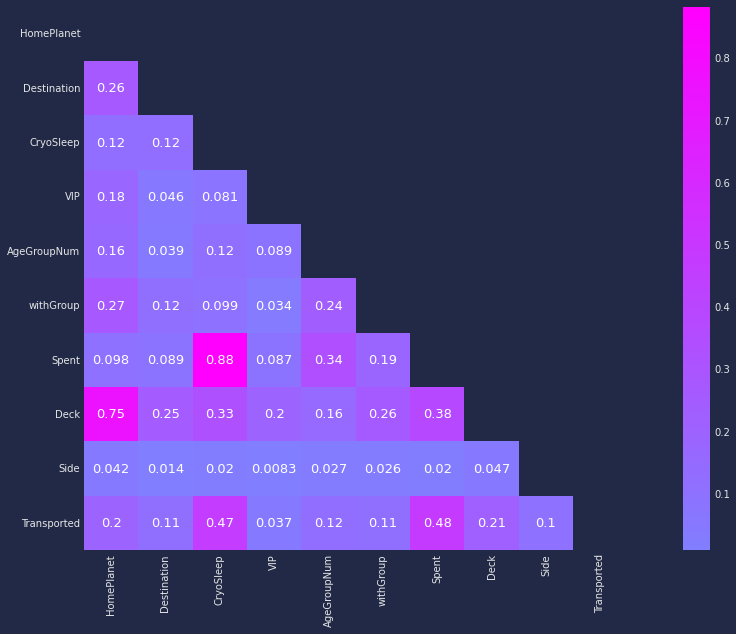

In [72]:
cat = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'AgeGroupNum', 'withGroup', 'Spent', 'Deck', 'Side', 'Transported']

# Create the dataFrame matrix with the returned Cramer's V
rows = []

for var1 in cat:
    col = []

    for var2 in cat:
        V = Cramers_V(X[var1], X[var2]) # Return Cramer's V
        col.append(V)                                             # Store values to subsequent columns  
    rows.append(col)                                              # Store values to subsequent rows
  
CramersV_results = np.array(rows)
CramersV_df = pd.DataFrame(CramersV_results, columns = cat, index = cat)

plt.subplots(figsize=(20,10))
corr = np.corrcoef(np.random.randn(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(CramersV_df, mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

To address multicollinearity, I will be removing *Spent* in favor of *CryoSleep*.

<AxesSubplot:>

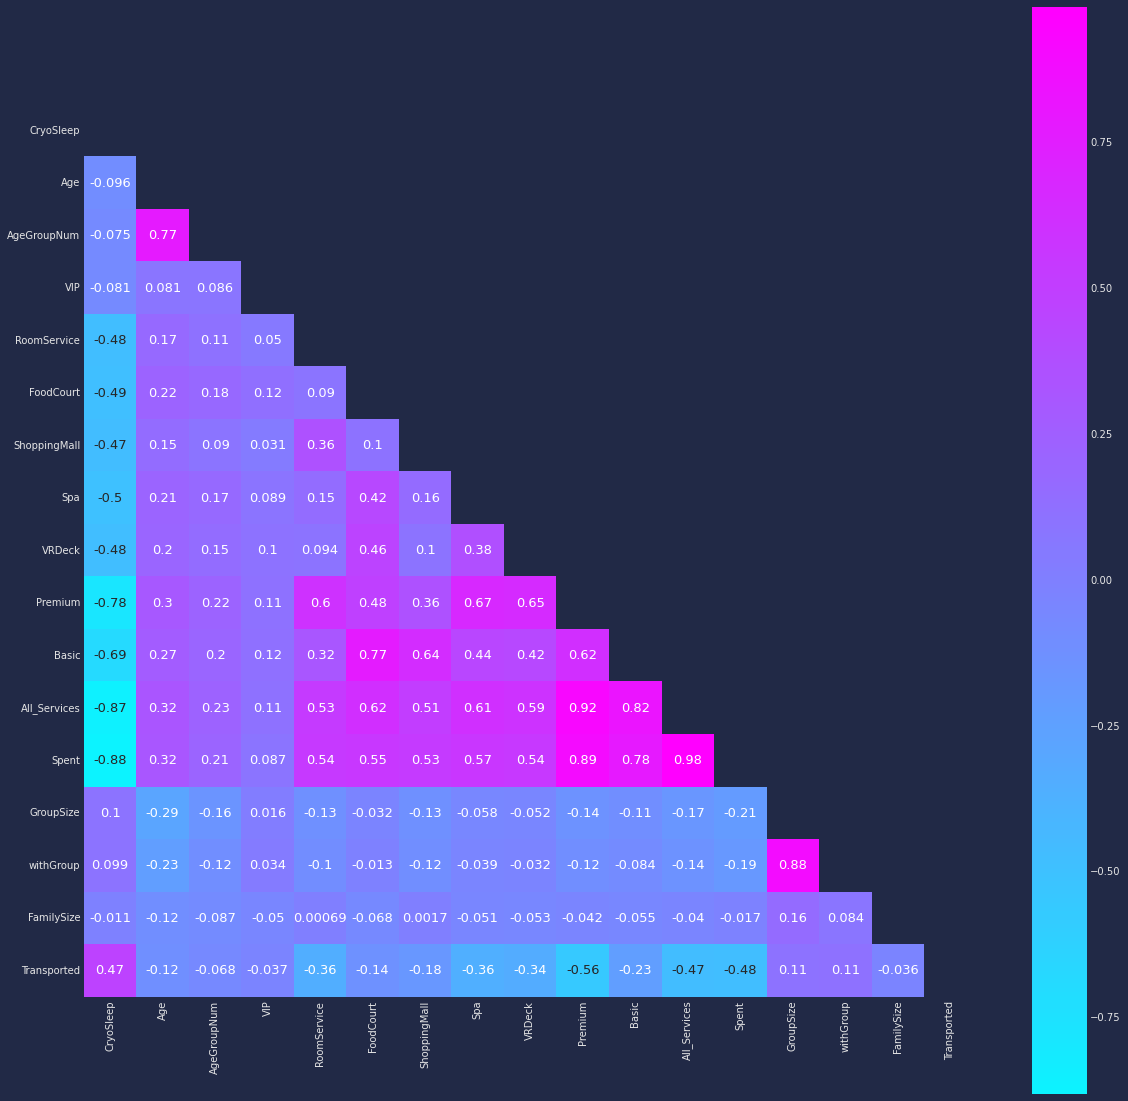

In [73]:
num = X[['CryoSleep', 'Age', 'AgeGroupNum', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'Basic', 'All_Services', 'Spent', 'GroupSize', 'withGroup', 'FamilySize', 'Transported']]

plt.subplots(figsize=(20,20))
corr = np.corrcoef(np.random.randn(17, 17))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

In [74]:
for dataset in df_prep:
    # Drop irrelevant and multicollinear features
    dataset.drop(['RoomService', 'Spa', 'VRDeck', 'All_Services', 'Spent', 'FoodCourt', 'ShoppingMall', 'GroupSize', 'VIP', 'FamilySize'], axis=1, inplace=True)
    
    # Drop high cardinal features
    dataset.drop(['PassengerId', 'Name', 'Cabin', 'Group', 'AgeGroup', 'AgeGroupNum', 'Num', 'FirstName', 'LastName'], axis=1, inplace=True)

In [75]:
print(X.shape, y.shape, X_test.shape)

(8693, 10) (8693,) (4277, 9)


In [76]:
# One Hot Encode
to_onehot = ['HomePlanet', 'Destination', 'Deck']

X = pd.get_dummies(X, columns=to_onehot)
X_test = pd.get_dummies(X_test, columns=to_onehot)

In [77]:
y_train = X['Transported']
X.drop(['Transported'], axis=1, inplace=True)

In [78]:
X

,CryoSleep,Age,Premium,Basic,withGroup,Side,HomePlanet_0,HomePlanet_1,HomePlanet_2,Destination_0,Destination_1,Destination_2,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,0.638143,-1.044550,-0.913662,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0.005145,0.878791,0.187371,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1.161585,1.544954,1.620256,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0.419263,1.351667,1.381576,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,0,-0.514263,0.941662,0.759459,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.703853,1.140961,1.820106,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
8689,1,-0.364465,-1.044550,-0.913662,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
8690,0,0.108796,-0.841180,1.419896,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
8691,0,0.379058,1.357113,1.240667,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0


# Model Training
I will run my model through some common supervised model algorithms.
- Logistic Regression
- Support Vector Classifier
- Decision Tree
- Random Forest
- XGBoost

In [79]:
from sklearn.model_selection import cross_val_score

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X_train = X.copy()

# Defining a list of Machine Learning Algorithms I will be running
MLA = [
    LogisticRegression(max_iter = 2000),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
#     CatBoostClassifier() Running CatBoost causes error
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results.mean()
    
    row_index+=1

# Present table
MLA_compare.sort_values(by=['Accuracy'], ascending=False, inplace=True)
MLA_compare

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy
1,SVC,0.806054
6,LGBMClassifier,0.804101
5,XGBClassifier,0.801226
0,LogisticRegression,0.793516
4,RandomForestClassifier,0.792366
2,KNeighborsClassifier,0.780173
3,DecisionTreeClassifier,0.748421


**Conclusion.** Among the model algorithms with default parameters, the top 3 best perorming classifiers turned out to be SVC, followed by XGB, followed by LR.

# Hypertune Parameters

I already ran the code below for hypertuning parameters and found the optimal parameters as listed below. The code was commented out in the interest of time, but will servce as your reference how I ran my optimization.

In [80]:
# from sklearn.model_selection import GridSearchCV 
# from sklearn.model_selection import RandomizedSearchCV

# svc = SVC(probability = True)

# svc_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
#             'kernel': ['linear', 'rbf'],
#             'gamma': ['scale', 'auto']}

# svc_optimal = GridSearchCV(svc, svc_grid, scoring = 'accuracy')
# svc_optimal.fit(X_train, y_train)
# print(svc_optimal.best_score_)
# print(svc_optimal.best_params_)

# # Best scores and params
# # 0.8052478475586475
# # {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [81]:
# lgbm = LGBMClassifier()

# boost_grid = {'n_estimators': [100, 500, 1000],
#               'max_depth': [4, 8, 12],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15]}

# lgbm_optimal = GridSearchCV(lgbm, boost_grid, scoring = 'accuracy')
# lgbm_optimal.fit(X_train, y_train)
# print(lgbm_optimal.best_score_)
# print(lgbm_optimal.best_params_)

# # Best scores and params
# # 0.8040986877237888
# # {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}

In [82]:
# xgb = XGBClassifier()

# xgb_optimal = GridSearchCV(xgb, boost_grid, scoring = 'accuracy')
# xgb_optimal.fit(X_train, y_train)
# print(xgb_optimal.best_score_)
# print(xgb_optimal.best_params_)

# # Best score and params
# # 0.8036369988968965
# # {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}

In [83]:
# Tuned models
xgb_optimal = XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=1000)
svc_optimal = SVC(C=1.5, gamma='scale', kernel='rbf')
lgbm_optimal = LGBMClassifier(learning_rate=0.05, max_depth=8, n_estimators=100)

# Ensemble Model

In [84]:
from sklearn.ensemble import VotingClassifier

# Create Hard Voting Classifier
Ensemble_HV = VotingClassifier(estimators= [('SVC', svc_optimal),
                                           ('XBG', xgb_optimal),
                                           ('LGBM', lgbm_optimal)],
                              voting = 'hard')

# Create Soft Voting Classifier
Ensemble_SV = VotingClassifier(estimators= [('SVC', svc_optimal),
                                           ('XBG', xgb_optimal),
                                           ('LGBM', lgbm_optimal)],
                              voting = 'soft')

# Return Accuracy Scores
cv_HV = cross_val_score(Ensemble_HV, X_train, y_train, scoring='accuracy')
cv_SV = cross_val_score(Ensemble_SV, X_train, y_train, scoring='accuracy')

print('Hard Voting Classifier:' , cv_HV.mean())
print('Soft Voting Classifier:' , cv_SV.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X)

[18:29:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X)

[18:29:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X)

[18:29:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X)

[18:29:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Hard Voting Classifier: 0.8065132733056245
Soft Voting Classifier: nan


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X)

# Submission

In [85]:
# Defining a function to predict solutions
def predict(model):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    pred = pd.DataFrame({
    'PassengerId': test_df_copy['PassengerId'],
    'Transported': Y_pred
})
    return pred

In [86]:
predict(svc_optimal).to_csv('submission_svc_optimal.csv', index=False)

In [87]:
predict(lgbm_optimal).to_csv('submission_lgbm_optimal.csv', index=False)

In [88]:
predict(xgb_optimal).to_csv('submission_xgb_optimal.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
predict(Ensemble_HV).to_csv('submission_Ensemble_HV.csv', index=False)
# predict(Ensemble_HV).to_csv('submission_Ensemble_SV.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## My Other Works
Check out my KAGGLE profile and my other contributions
- [Attack-on-Titanic Solution Walkthrough | Kaggle](https://www.kaggle.com/code/shilongzhuang/attack-on-titanic-solution-walkthrough-top-8)

---
# References

Special thanks and credits to these awesome and comprehensively informative resources (notebooks) and guides created by talented professionals in the field, which were able to guide me while creating this work.

- [A Data Science Framework: To achieve 99% Accuracy](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
- [Spaceship Titanic: A complete guide](https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide)